## Assignment2 - Supervised Learning flow

### Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [54]:

# student 1:Avivit Lazra
# student 2:Shay Marsiano
# student 3: Dvir Uliel
# student 4: Idan Ovadia
# (optional) student 5:
# (optional) student 6:


## Part 2 - Experiments
You could add as many code cells as needed

In [55]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, make_scorer, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

#from IPython.display import display


In [56]:
def load_dataset(fileName):
    df= pd.read_csv(fileName)
    return df
    

In [57]:
#load and print the first five instances of the train set
trainSet=load_dataset("wine_train.csv")
print("Train set:" )
trainSet.head()


Train set:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,12.08,1.83,2.32,18.5,81.0,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480.0,1
1,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750.0,2
2,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,1
3,11.82,1.72,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415.0,1
4,13.16,3.57,2.15,21.0,102.0,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830.0,2


In [58]:
#load and print the first five instances of the test set
testSet=load_dataset("wine_test.csv")
print("Test set:" )
testSet.head()

Test set:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,13.78,2.76,2.30,22.0,90.0,1.35,0.68,0.41,1.03,9.58,0.70,1.68,615.0,2
1,14.02,1.68,2.21,16.0,96.0,2.65,2.33,0.26,1.98,4.70,1.04,3.59,1035.0,0
2,13.17,5.19,2.32,22.0,93.0,1.74,0.63,0.61,1.55,7.90,0.60,1.48,725.0,2
3,11.03,1.51,2.20,21.5,85.0,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407.0,1
4,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2


In [59]:
#charts and visualizations
#1 only numeric columns
#first table - statistics information
summary_table=trainSet.describe()
print("Math statistics:")
display(summary_table)



Math statistics:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,12.997254,2.297746,2.361690,19.419718,99.943662,2.315986,2.063592,0.346690,1.561901,5.030211,0.958563,2.638873,742.457746,0.922535
std,0.789931,1.093317,0.283231,3.354815,13.683751,0.639469,1.005302,0.117562,0.540979,2.239593,0.219631,0.718083,317.250905,0.772524
min,11.410000,0.740000,1.360000,10.600000,78.000000,0.980000,0.340000,0.130000,0.420000,1.280000,0.480000,1.290000,278.000000,0.000000
25%,12.370000,1.592500,2.222500,17.250000,88.000000,1.782500,1.257500,0.260000,1.250000,3.180000,0.800000,1.922500,500.000000,0.000000
50%,13.050000,1.865000,2.360000,19.250000,98.000000,2.380000,2.155000,0.320000,1.505000,4.800000,0.960000,2.815000,660.000000,1.000000
75%,13.637500,3.020000,2.557500,21.375000,108.000000,2.822500,2.887500,0.430000,1.870000,6.182500,1.120000,3.197500,957.500000,2.000000
max,14.750000,5.650000,3.230000,30.000000,151.000000,3.880000,5.080000,0.630000,3.580000,11.750000,1.450000,4.000000,1680.000000,2.000000


In [60]:
#chart to display the correlation between the features
#second table - correlation information

correlation_matrix = trainSet.corr()
print("correlation matrix:")
display(correlation_matrix)

correlation matrix:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,0.125775,0.266255,-0.324234,0.308843,0.271331,0.247231,-0.088818,0.137788,0.538669,-0.009125,0.066571,0.668455,-0.342386
malic_acid,0.125775,1.000000,0.191182,0.282662,0.020063,-0.322301,-0.388624,0.287977,-0.185538,0.250443,-0.550526,-0.328693,-0.150744,0.392434
ash,0.266255,0.191182,1.000000,0.423830,0.378546,0.161905,0.164921,0.148841,0.065193,0.270956,-0.067239,0.040355,0.275818,-0.109604
alcalinity_of_ash,-0.324234,0.282662,0.423830,1.000000,-0.011331,-0.314082,-0.328843,0.316834,-0.210546,-0.016108,-0.258432,-0.260420,-0.419231,0.502200
magnesium,0.308843,0.020063,0.378546,-0.011331,1.000000,0.209336,0.182837,-0.232630,0.145813,0.244744,0.021679,0.054141,0.388856,-0.215107
total_phenols,0.271331,-0.322301,0.161905,-0.314082,0.209336,1.000000,0.869634,-0.414451,0.625767,-0.068393,0.442778,0.716507,0.488763,-0.726069
flavanoids,0.247231,-0.388624,0.164921,-0.328843,0.182837,0.869634,1.000000,-0.515106,0.680019,-0.133475,0.529995,0.781781,0.489195,-0.838060
nonflavanoid_phenols,-0.088818,0.287977,0.148841,0.316834,-0.232630,-0.414451,-0.515106,1.000000,-0.382196,0.164591,-0.293616,-0.481035,-0.229793,0.455551
proanthocyanins,0.137788,-0.185538,0.065193,-0.210546,0.145813,0.625767,0.680019,-0.382196,1.000000,-0.028767,0.291350,0.546202,0.345552,-0.542524
color_intensity,0.538669,0.250443,0.270956,-0.016108,0.244744,-0.068393,-0.133475,0.164591,-0.028767,1.000000,-0.487257,-0.419104,0.350029,0.236329


Histogram plots:


array([[<Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'malic_acid'}>,
        <Axes: title={'center': 'ash'}>,
        <Axes: title={'center': 'alcalinity_of_ash'}>],
       [<Axes: title={'center': 'magnesium'}>,
        <Axes: title={'center': 'total_phenols'}>,
        <Axes: title={'center': 'flavanoids'}>,
        <Axes: title={'center': 'nonflavanoid_phenols'}>],
       [<Axes: title={'center': 'proanthocyanins'}>,
        <Axes: title={'center': 'color_intensity'}>,
        <Axes: title={'center': 'hue'}>,
        <Axes: title={'center': 'od280/od315_of_diluted_wines'}>],
       [<Axes: title={'center': 'proline'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

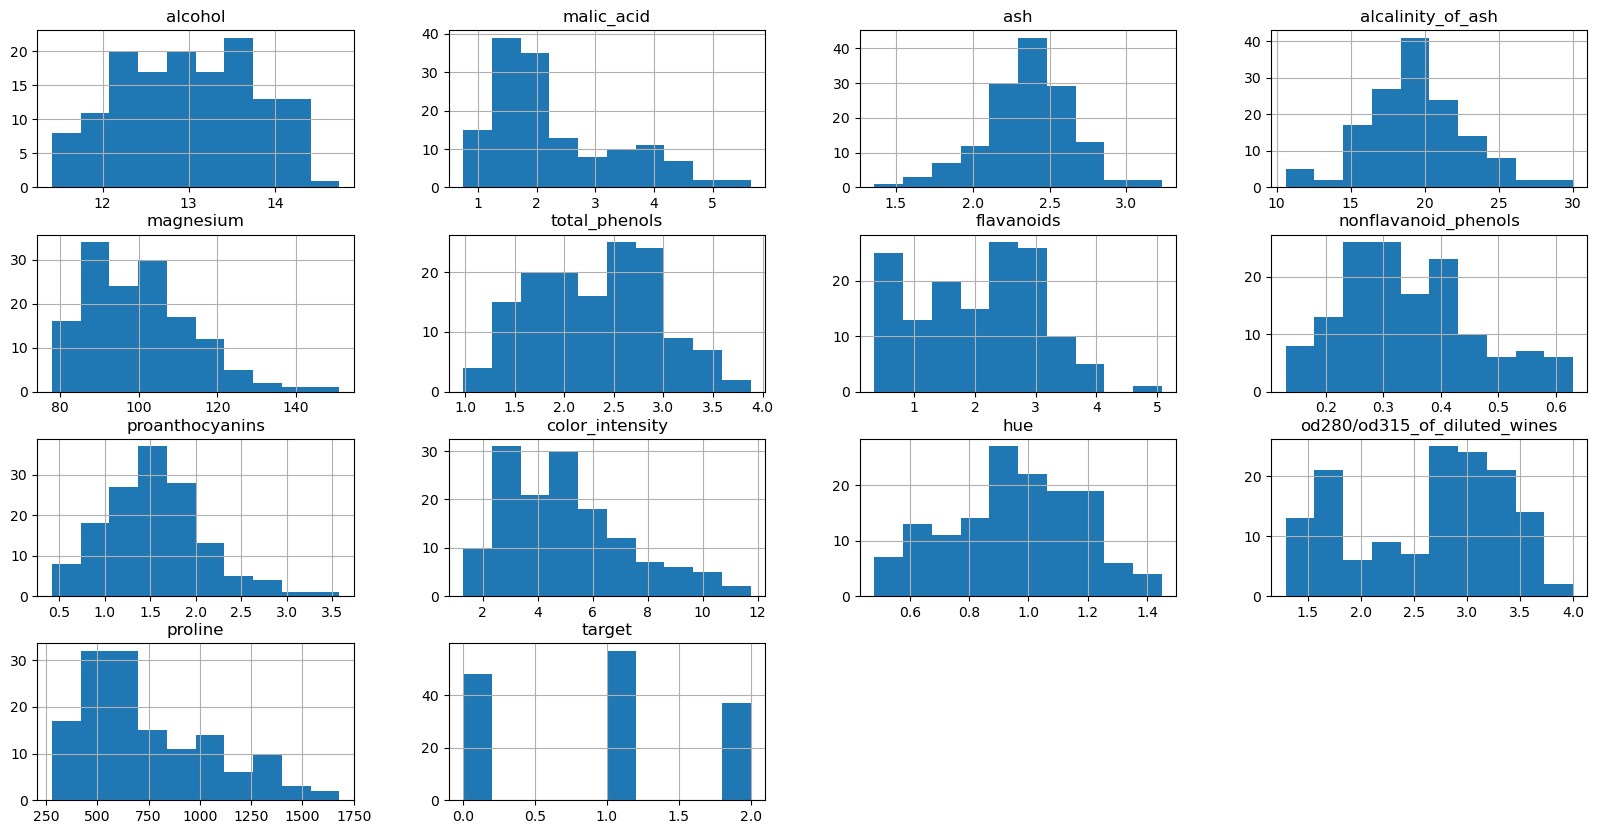

In [61]:
#histogram for each feature that represents the values 
#first visualization - histogram plot
print("Histogram plots:")
trainSet.hist(figsize=(20, 10))


Scatter plots:


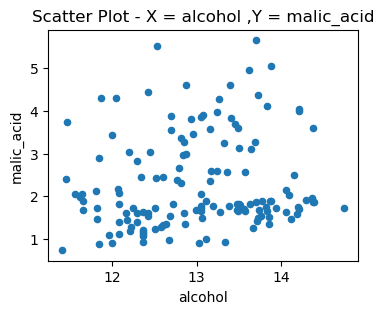

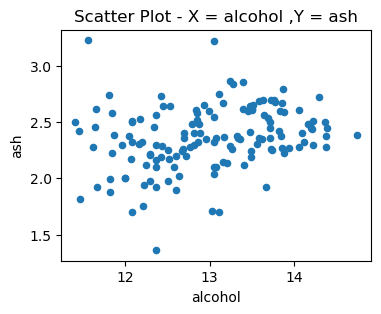

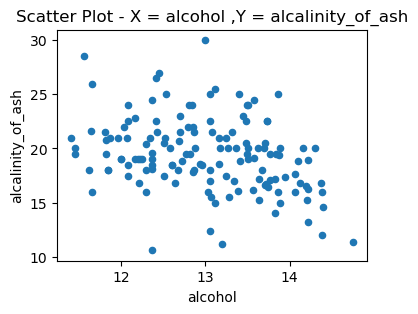

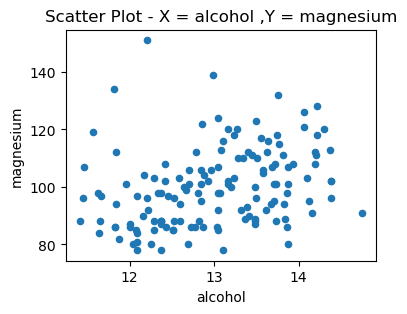

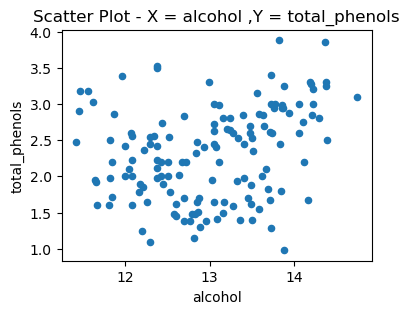

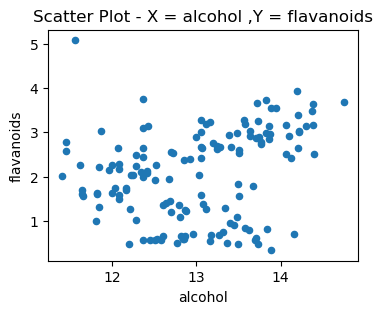

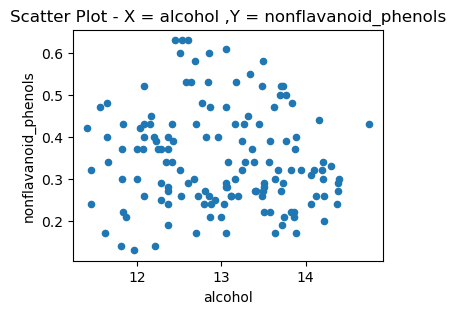

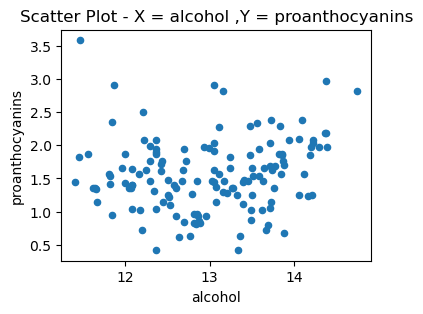

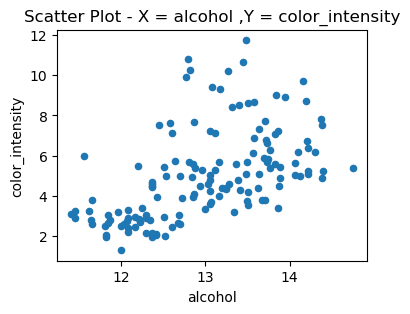

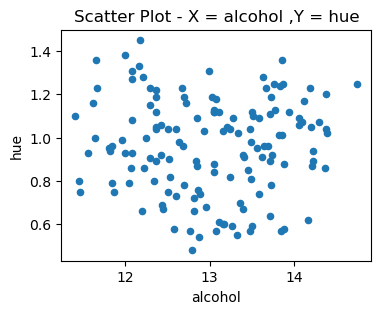

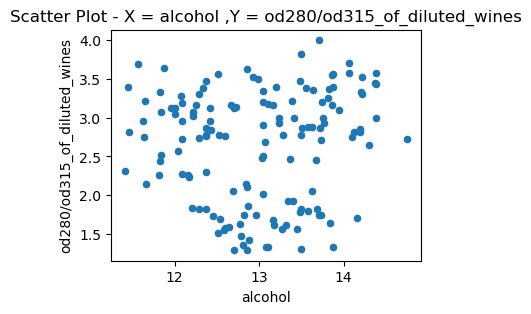

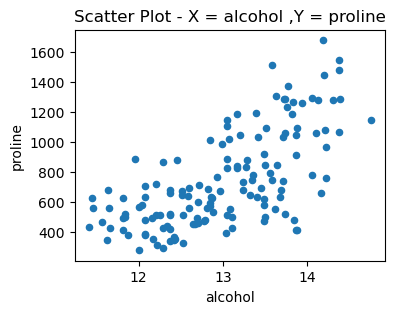

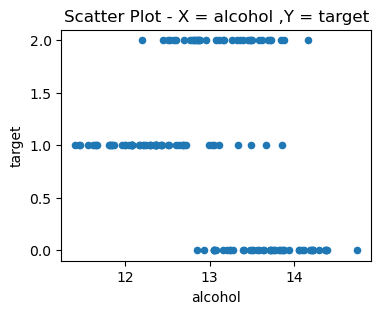

In [62]:
# Plot scatter plot of X vs Y while x is "alcohol" column and y is the rest
#first visualization - scatter plot
print("Scatter plots:")

for col in trainSet.columns:
    if(col!="alcohol"):
        current_title="Scatter Plot - X = alcohol ,Y = "+str(col)
        trainSet.plot.scatter(x='alcohol', y=col, figsize=(4, 3), title=current_title)


In [63]:
#feature engineering - Feature Selection

#remove data with high correlation to improve the model performence
#creating update dataset named new_trainSet

cor_target=abs(correlation_matrix["target"]) 
high_correlation_data=cor_target[cor_target>0.8] 
high_correlation_columns=high_correlation_data.index.tolist()
high_correlation_columns

new_trainSet=trainSet.copy()
new_testSet=testSet.copy()

new_trainSet=new_trainSet.drop(columns=high_correlation_columns)#remove high correlation columns from the trainSet
new_testSet=testSet.drop(columns=high_correlation_columns) #remove high correlation columns from the testSet

print("Train set without high correlation data:")
display(new_trainSet)
print("Test set without high correlation data:")
display(new_testSet)



Train set without high correlation data:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,12.08,1.83,2.32,18.5,81.0,1.60,0.52,1.64,2.40,1.08,2.27,480.0
1,13.58,2.58,2.69,24.5,105.0,1.55,0.39,1.54,8.66,0.74,1.80,750.0
2,12.37,0.94,1.36,10.6,88.0,1.98,0.28,0.42,1.95,1.05,1.82,520.0
3,11.82,1.72,1.88,19.5,86.0,2.50,0.37,1.42,2.06,0.94,2.44,415.0
4,13.16,3.57,2.15,21.0,102.0,1.50,0.43,1.30,4.00,0.60,1.68,830.0
...,...,...,...,...,...,...,...,...,...,...,...,...
137,13.20,1.78,2.14,11.2,100.0,2.65,0.26,1.28,4.38,1.05,3.40,1050.0
138,14.19,1.59,2.48,16.5,108.0,3.30,0.32,1.86,8.70,1.23,2.82,1680.0
139,12.08,1.13,2.51,24.0,78.0,2.00,0.40,1.40,2.20,1.31,2.72,630.0
140,14.20,1.76,2.45,15.2,112.0,3.27,0.34,1.97,6.75,1.05,2.85,1450.0


Test set without high correlation data:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,13.78,2.76,2.30,22.0,90.0,1.35,0.41,1.03,9.58,0.70,1.68,615.0
1,14.02,1.68,2.21,16.0,96.0,2.65,0.26,1.98,4.70,1.04,3.59,1035.0
2,13.17,5.19,2.32,22.0,93.0,1.74,0.61,1.55,7.90,0.60,1.48,725.0
3,11.03,1.51,2.20,21.5,85.0,2.46,0.52,2.01,1.90,1.71,2.87,407.0
4,13.40,3.91,2.48,23.0,102.0,1.80,0.43,1.41,7.30,0.70,1.56,750.0
5,13.05,5.80,2.13,21.5,86.0,2.62,0.30,2.01,2.60,0.73,3.10,380.0
6,13.68,1.83,2.36,17.2,104.0,2.42,0.42,1.97,3.84,1.23,2.87,990.0
7,12.33,0.99,1.95,14.8,136.0,1.90,0.35,2.76,3.40,1.06,2.31,750.0
8,12.47,1.52,2.20,19.0,162.0,2.50,0.32,3.28,2.60,1.16,2.63,937.0
9,11.76,2.68,2.92,20.0,103.0,1.75,0.60,1.05,3.80,1.23,2.50,607.0


In [64]:
#feature engineering method - Normalization

#normalize by min max with range of [0,1]
#by the formula, (current_value - min_value[i])/(max_value[i] - min_value[i])
normalized_trainSet = new_trainSet.copy()
min_values_train = []
max_values_train = []

for col in normalized_trainSet.columns:
    min_values_train.append(normalized_trainSet[col].min())
    max_values_train.append(normalized_trainSet[col].max())
    
for i, col in enumerate(normalized_trainSet.columns):
    normalized_trainSet[col] = (normalized_trainSet[col] - min_values_train[i]) / (max_values_train[i] - min_values_train[i]) 
normalized_trainSet

#doing the same for the test set
normalized_testSet = new_testSet.copy()
min_values_test = []
max_values_test = []

for col in normalized_testSet.columns:
    min_values_test.append(normalized_testSet[col].min())
    max_values_test.append(normalized_testSet[col].max())
    
for i, col in enumerate(normalized_testSet.columns):
    normalized_testSet[col] = (normalized_testSet[col] - min_values_test[i]) / (max_values_test[i] - min_values_test[i])    

#Using data for the models
X_train = normalized_trainSet
y_train = trainSet['target']
X_test = normalized_testSet
y_test = testSet['target']




In [65]:
#using decision tree as a model

#hyper parameter 1 - min_samples_split, the minimum number of samples required to split an internal node
#hyper parameter 2 - min_samples_leaf, controls the randomness of the estimator and helps with the training
#hyper parameter 3 - max_depth, the maximum depth of the tree
#hyper parameter 4 - criterion, helps the model choose the best next feature. Supported criteria are “gini” and “entropy” 

model_dt = DecisionTreeClassifier(min_samples_split=5, min_samples_leaf=2, max_depth=10, criterion="gini")
model_dt.fit(X_train, y_train)
y_pred = model_dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree model's accuracy: ",accuracy)


Decision Tree model's accuracy:  0.8611111111111112


In [66]:
#using knn as a model

#hyper parameter 1 - n_neighbors, number of neighbors to use by default for k neighbors queries.

#hyper parameter 2 - metric, using for distance computation like "minkowski" or "manhatten" and "euclidean".

#hyper parameter 3 - p, power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan
#and euclidean distance, for p = 2 minkowski distance is used

#hyper parameter 4 - weights, Weight function used in prediction.
#‘uniform’ : All points in each neighborhood are weighted equally.
#‘distance’ : weight points by the inverse of their distance. 


knn = KNeighborsClassifier(n_neighbors=5,metric='minkowski',weights='uniform',p=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Knn model's accuracy: ",accuracy)



Knn model's accuracy:  0.9722222222222222


In [67]:
model_dt = DecisionTreeClassifier()

param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

scorer_dt = make_scorer(f1_score, average='macro')
grid_search_dt = GridSearchCV(model_dt, param_grid_dt, cv=5, scoring=scorer_dt)
grid_search_dt.fit(X_train,y_train)
results_df_dt = pd.DataFrame(grid_search_dt.cv_results_)

best_mean_dt = grid_search_dt.best_score_ # best f1_score
best_results_dt = results_df_dt[results_df_dt["mean_test_score"] == best_mean_dt] # Extract the best parameters  

#making dictionary for the best combination
best_params_row = best_results_dt.iloc[0]
best_params_dict_dt = {
    'criterion': best_params_row['param_criterion'],
    'max_depth': best_params_row['param_max_depth'],
    'min_samples_split': best_params_row['param_min_samples_split'],
    'min_samples_leaf': best_params_row['param_min_samples_leaf']
}

print("Decision Tree - best hyper params combination is: ")
print("criterion:",best_params_dict_dt['criterion'])
print("max_depth:",best_params_dict_dt['max_depth'])
print("min_samples_split:",best_params_dict_dt['min_samples_split'])
print("min_samples_leaf:",best_params_dict_dt['min_samples_leaf'])
print("\nThe best score is: ",best_mean_dt)

print("\nDecision Tree Results:")
ascendind_results=results_df_dt.sort_values(by="mean_test_score",ascending=False)
display(ascendind_results)


Decision Tree - best hyper params combination is: 
criterion: entropy
max_depth: 30
min_samples_split: 10
min_samples_leaf: 1

The best score is:  0.9292358092095607

Decision Tree Results:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
65,0.000968,0.000206,0.000813,0.000020,entropy,30,1,10,"{'criterion': 'entropy', 'max_depth': 30, 'min...",0.931174,0.897311,0.924603,0.964519,0.928571,0.929236,0.021400,1
37,0.000874,0.000013,0.000795,0.000002,entropy,None,1,5,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.931174,0.831349,0.963285,0.964519,0.928571,0.923780,0.048665,2
46,0.000870,0.000016,0.000800,0.000006,entropy,10,1,5,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.931174,0.828478,0.963285,0.929515,0.928571,0.916205,0.045753,3
64,0.001007,0.000131,0.000872,0.000097,entropy,30,1,5,"{'criterion': 'entropy', 'max_depth': 30, 'min...",0.931174,0.863027,0.963285,0.924916,0.896825,0.915846,0.033821,4
9,0.000858,0.000014,0.000836,0.000018,gini,10,1,2,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.969634,0.827536,0.891359,0.928030,0.959866,0.915285,0.051722,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,0.000839,0.000030,0.000841,0.000014,gini,None,4,10,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.969123,0.829630,0.825397,0.713251,0.885486,0.844577,0.083694,68
15,0.000825,0.000011,0.000824,0.000009,gini,10,4,2,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.969123,0.827536,0.825397,0.713251,0.885486,0.844159,0.083773,69
30,0.000923,0.000026,0.000898,0.000026,gini,30,2,2,"{'criterion': 'gini', 'max_depth': 30, 'min_sa...",0.889864,0.863492,0.858442,0.713251,0.885486,0.842107,0.065560,70
16,0.000823,0.000014,0.000823,0.000008,gini,10,4,5,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.932456,0.829630,0.825397,0.713251,0.885486,0.837244,0.073438,71


In [68]:
model_knn = KNeighborsClassifier()


param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2]
}
scorer_knn = make_scorer(f1_score, average='macro')
grid_search_knn = GridSearchCV(model_knn, param_grid, cv=5, scoring=scorer_knn)
grid_search_knn.fit(X_train,y_train)
results_df_knn = pd.DataFrame(grid_search_knn.cv_results_)


best_mean_knn = grid_search_knn.best_score_ # best f1_score
best_results_knn = results_df_knn[results_df_knn["mean_test_score"] == best_mean_knn] # Extract the best parameters into a list 

best_params_row = best_results_knn.iloc[0]
best_params_dict_knn = {
    'n_neighbors': best_params_row['param_n_neighbors'],
    'weights': best_params_row['param_weights'],
    'metric': best_params_row['param_metric'],
    'p': best_params_row['param_p']
}
print("Knn - best hyper params combination is: ")
print("n_neighbors:",best_params_dict_knn['n_neighbors'])
print("weights:",best_params_dict_knn['weights'])
print("metric:",best_params_dict_knn['metric'])
print("p:",best_params_dict_knn['p'])
print("\nThe best score is: ",best_mean_knn)

print("\nKnn Results:")

ascendind_results=results_df_knn.sort_values(by="mean_test_score",ascending=False)
display(ascendind_results)



Knn - best hyper params combination is: 
n_neighbors: 9
weights: uniform
metric: manhattan
p: 1

The best score is:  0.9722727272727273

Knn Results:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,param_p,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
36,0.000641,0.000069,0.001541,0.000119,manhattan,9,1,uniform,"{'metric': 'manhattan', 'n_neighbors': 9, 'p':...",1.00000,0.861364,1.000000,1.000000,1.000000,0.972273,0.055455,1
56,0.000690,0.000179,0.001477,0.000058,minkowski,9,1,uniform,"{'metric': 'minkowski', 'n_neighbors': 9, 'p':...",1.00000,0.861364,1.000000,1.000000,1.000000,0.972273,0.055455,1
38,0.000714,0.000134,0.001608,0.000148,manhattan,9,2,uniform,"{'metric': 'manhattan', 'n_neighbors': 9, 'p':...",1.00000,0.861364,1.000000,1.000000,1.000000,0.972273,0.055455,1
59,0.000674,0.000093,0.001156,0.000148,minkowski,9,2,distance,"{'metric': 'minkowski', 'n_neighbors': 9, 'p':...",1.00000,0.858637,1.000000,1.000000,1.000000,0.971727,0.056545,4
12,0.000677,0.000106,0.001478,0.000028,euclidean,7,1,uniform,"{'metric': 'euclidean', 'n_neighbors': 7, 'p':...",1.00000,0.858637,1.000000,1.000000,1.000000,0.971727,0.056545,4
37,0.000601,0.000009,0.000992,0.000014,manhattan,9,1,distance,"{'metric': 'manhattan', 'n_neighbors': 9, 'p':...",1.00000,0.858637,1.000000,1.000000,1.000000,0.971727,0.056545,4
19,0.000672,0.000063,0.001231,0.000139,euclidean,9,2,distance,"{'metric': 'euclidean', 'n_neighbors': 9, 'p':...",1.00000,0.858637,1.000000,1.000000,1.000000,0.971727,0.056545,4
18,0.000697,0.000083,0.001618,0.000151,euclidean,9,2,uniform,"{'metric': 'euclidean', 'n_neighbors': 9, 'p':...",1.00000,0.858637,1.000000,1.000000,1.000000,0.971727,0.056545,4
17,0.000710,0.000211,0.001040,0.000098,euclidean,9,1,distance,"{'metric': 'euclidean', 'n_neighbors': 9, 'p':...",1.00000,0.858637,1.000000,1.000000,1.000000,0.971727,0.056545,4
16,0.000626,0.000061,0.001616,0.000187,euclidean,9,1,uniform,"{'metric': 'euclidean', 'n_neighbors': 9, 'p':...",1.00000,0.858637,1.000000,1.000000,1.000000,0.971727,0.056545,4


## Part 3 - Training flow
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 2)

In [72]:
model_knn = KNeighborsClassifier(**best_params_dict_knn)
model_knn.fit(X_train, y_train)


KNeighborsClassifier(metric='manhattan', n_neighbors=9, p=1)

## Part 4 - Apply on test and show model performance estimation

In [71]:
y_pred = model_knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

dict_comparison={"y_pred":y_pred,"y_test":y_test,"accuracy":y_pred==y_test}
df_comprasion=pd.DataFrame(dict_comparison)
print("Knn results:")
display(df_comprasion)
print("\nKnn model's accuracy: ",accuracy)

report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


Knn results:


,y_pred,y_test,accuracy
0,2,2,True
1,0,0,True
2,2,2,True
3,1,1,True
4,2,2,True
5,1,1,True
6,0,0,True
7,1,1,True
8,0,1,False
9,1,1,True



Knn model's accuracy:  0.9444444444444444

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.86      0.92        14
           2       0.92      1.00      0.96        11

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.95        36
weighted avg       0.95      0.94      0.94        36


Confusion Matrix:
[[11  0  0]
 [ 1 12  1]
 [ 0  0 11]]
